## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
combined_df["Mouse ID"].nunique()

249

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints.
#Creating dataframe object to hold data identifying duplicates
duplicaterows = pd.DataFrame(combined_df, columns = ["Mouse ID", "Timepoint"])


In [4]:
#Selecting the duplicate rows according to the column names
duplicate = duplicaterows[duplicaterows.duplicated(["Mouse ID", "Timepoint"])]
duplicate

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [5]:
#Checking info on mouse g989 to see duplicates
combined_df.loc[combined_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Drop any duplicate rows, created a new, cleaned, dataframe
#cleaned_df = combined_df.drop_duplicates(subset=["Mouse ID"], keep="first")
cleaned_df = combined_df[combined_df["Mouse ID"]!="g989"]

In [7]:
#Checking if the duplicates were dropped
cleaned_df.loc[cleaned_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [8]:
# Recheck the number of mice
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
summarystatistics = cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summarystatistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
#Creating dataframe to display drug regimen and counts
drugdatacount = cleaned_df["Drug Regimen"].value_counts().rename_axis("Drug Regimen").reset_index(name="counts")

In [11]:
#Setting the index
drugdatacount = drugdatacount.set_index("Drug Regimen")
drugdatacount.head()

,counts
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182


Text(0, 0.5, 'Datapoints')

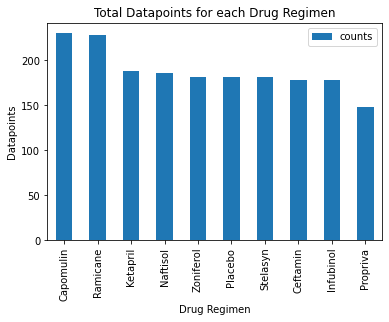

In [12]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
drugdatacount.plot(kind="bar")
plt.title("Total Datapoints for each Drug Regimen")
plt.ylabel("Datapoints")



In [13]:
# General identical bar plot using pyplot instead of pandas.
#Generating lists
Drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Ceftamin", "Infubinol", "Propriva"]
Datapoints = [230,228,188,186,182,181,181,178,178,156]
x_axis=np.arange(len(Drugs))
tick_locations = [value for value in x_axis]

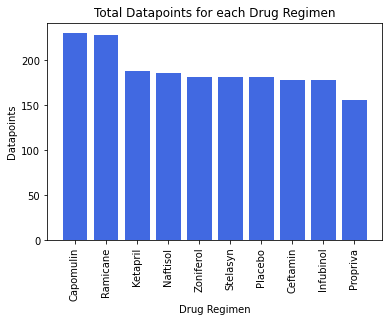

In [14]:
plt.bar(x_axis,Datapoints, color = "royalblue")
plt.title("Total Datapoints for each Drug Regimen")
plt.ylabel("Datapoints")
plt.xlabel("Drug Regimen")
plt.xticks(tick_locations, Drugs, rotation = "vertical")
plt.show()

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Creating value counts series from the dataframe
mf = cleaned_df["Sex"].value_counts()
mf


Male      958
Female    922
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

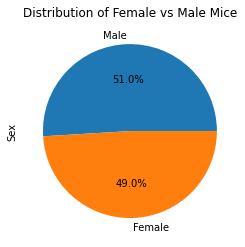

In [16]:
#Generating chart
mf.plot(kind="pie",autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")

In [17]:
#Generate identical pie plot using pyplot
#Designating data to draw upon
labels = ["Female","Male"]
sizes =  [930,958]
colors = ["orange","blue"]
explode = (0.1,0,0,0)

Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

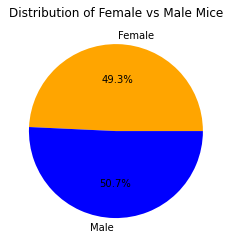

In [18]:
#Creating the pie chart based on the values above
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [20]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [21]:
#Grouping by mouse ID and maximum timepoint
mouseIDtimepoint_df=cleaned_df.groupby("Mouse ID")["Timepoint"].max()
mouseIDtimepoint_df

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [22]:
#Reset index so that it can merge
newmaxtime=mouseIDtimepoint_df.reset_index()

In [23]:
#Merging and renaming the dataframe
merged=pd.merge(newmaxtime,cleaned_df, on =("Mouse ID", "Timepoint"))
merged.rename(columns={"Timepoint":"Final Timepoint"})

,Mouse ID,Final Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [24]:
#put treatments into a list for loop (and later for plot labels)
druglist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [25]:
#Create empty list to fill with tumor volume data (for plotting)
tumorvollist=[]

In [26]:
#For loop

for drugname in druglist:
    tumorvoldata=merged.loc[merged["Drug Regimen"]==drugname]["Tumor Volume (mm3)"]
    tumorvollist.append(tumorvoldata)
    quartiles = tumorvoldata.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    
    outlier=tumorvoldata.loc[(tumorvoldata<lower_bound) | (tumorvoldata>upper_bound)]
    print(drugname, outlier)

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


In [27]:
tumorvollist

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

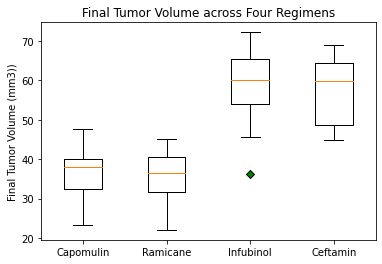

In [28]:
green_diamond=dict(markerfacecolor="g",marker = "D")
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume across Four Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3))')
#Creating boxplot from list made in loop
plt.boxplot(tumorvollist, labels = druglist, flierprops = green_diamond)
#Titles and axes
plt.show()

## Line and Scatter Plots

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse
# treated with Capomulin


In [30]:
#Finding mice treated with Capomulin
capomulindata = merged.loc[merged["Drug Regimen"]=="Capomulin"]
capomulindata

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


In [31]:
#Selected mouse f966. Get data from original dataframe for mouse f966.
f966info = cleaned_df.loc[cleaned_df["Mouse ID"]=="f966"]
f966info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
60,f966,Capomulin,Male,16,17,0,45.000000,0
61,f966,Capomulin,Male,16,17,5,38.796474,0
62,f966,Capomulin,Male,16,17,10,35.624403,0
63,f966,Capomulin,Male,16,17,15,32.623003,0
64,f966,Capomulin,Male,16,17,20,30.485985,0


In [32]:
#Different method
f966new=pd.DataFrame(f966info, columns=["Timepoint","Tumor Volume (mm3)"])

Text(0.5, 1.0, 'Mouse f966 Tumor over Time')

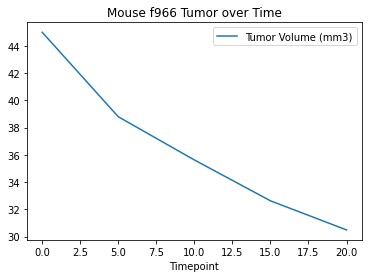

In [33]:
#Creating line chart for mouse f966
f966new.plot(x="Timepoint", y= "Tumor Volume (mm3)", kind ="line")
plt.title("Mouse f966 Tumor over Time")

In [34]:
#Dataframe holding only Capomulin data
capomulinonly=cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
capomulinonly

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [35]:
#Checking how many mice there are in capomulin to see how many data points in scatter plot there should be
capomulinonly["Mouse ID"].nunique()

25

In [36]:
#Creating Variable for mouse weight
mouseweight = capomulinonly.groupby("Mouse ID")["Weight (g)"].mean()

In [37]:
#Creating Variable for the average tumor size per mouse
avgtumor = capomulinonly.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

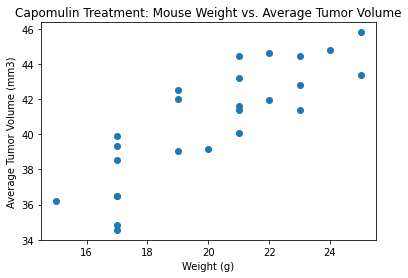

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for all mice in the Capomulin regimen

x_values = mouseweight
y_values = avgtumor
plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Capomulin Treatment: Mouse Weight vs. Average Tumor Volume")
plt.show()


## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen

In [40]:
#put variables created into another df to make this easier
tumorvolandweight = pd.merge(mouseweight, avgtumor, on='Mouse ID')
tumorvolandweight

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


The r-squared is: 0.7088568047708717


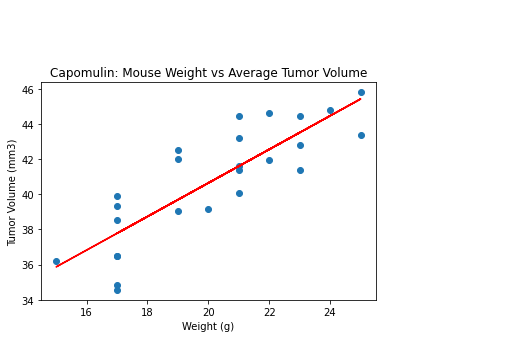

In [41]:
#COPIED FROM CLASS EXAMPLE: CORR COEFFICIENT

x_values = tumorvolandweight['Weight (g)']
y_values = tumorvolandweight['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin: Mouse Weight vs Average Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()





# Observations and Insights